### Creator - Aditya S. Yadav

## Importing all the necessary Libraries

In [631]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer


from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [632]:
df = pd.read_csv('advertising (1).csv')

In [633]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [634]:
df.shape

(200, 4)

## Checking if Null Values exist

In [635]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [636]:
df.duplicated().sum()

0

In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [638]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## From Above we can conclude that the price of TV sets are much higher compared to others

In [639]:
cor = df.corr(numeric_only=True)

<Axes: >

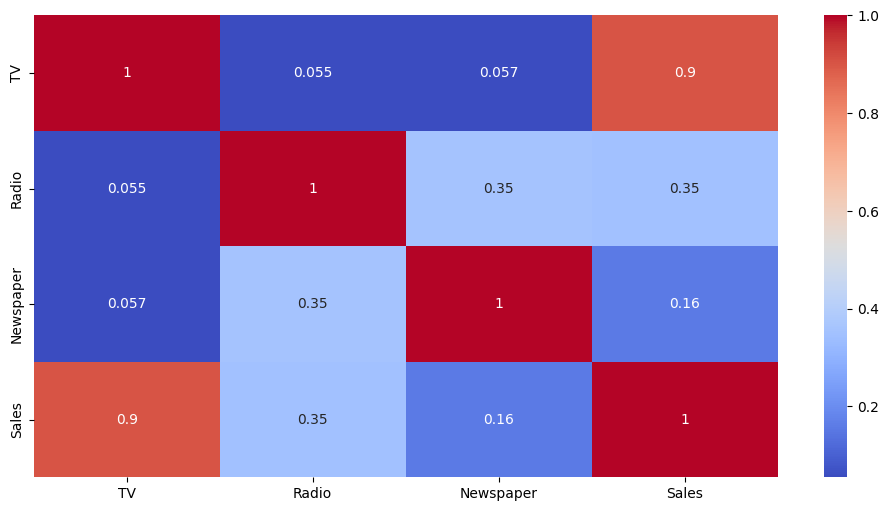

In [640]:
plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True,cmap='coolwarm')

### Newspaper and Radio are highly correlated

In [641]:
df.cov()

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,408.828044
Radio,69.862492,220.427743,114.496979,27.428189
Newspaper,105.919452,114.496979,474.308326,18.177390
Sales,408.828044,27.428189,18.177390,27.919517


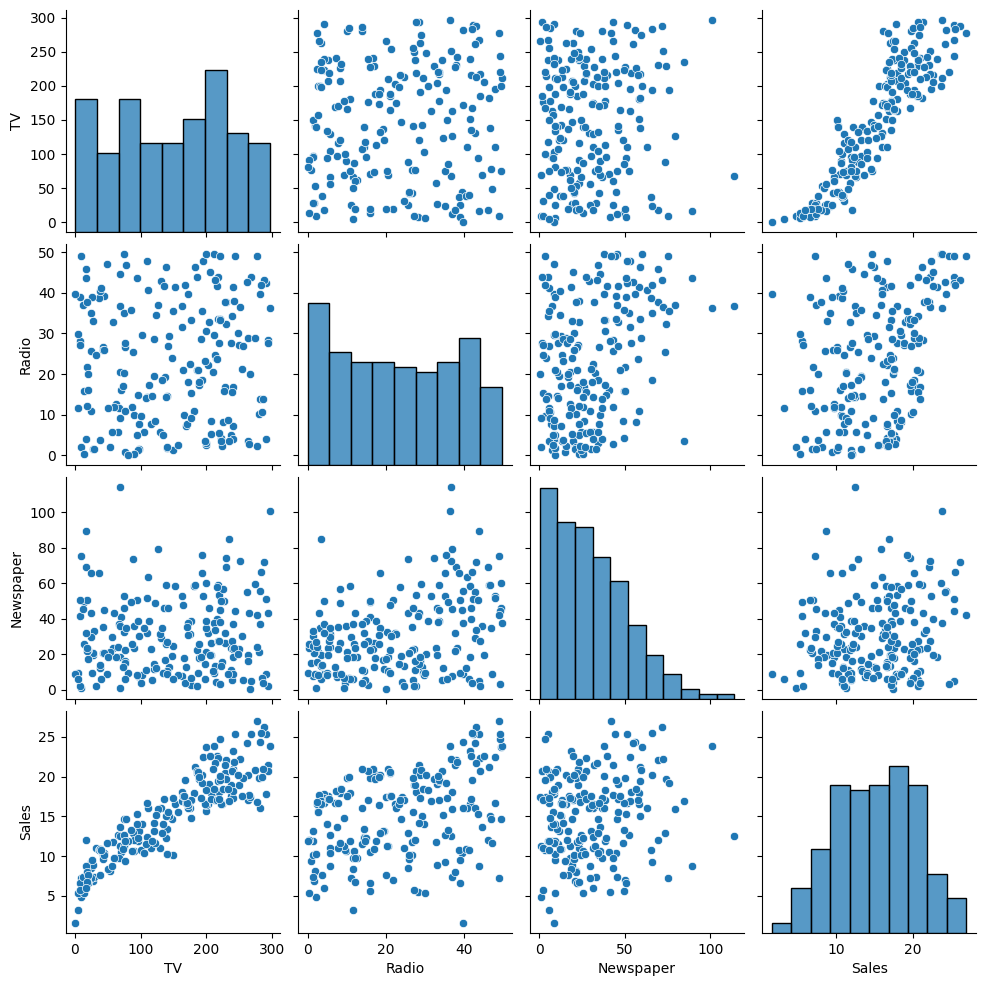

In [642]:
sns.pairplot(df)

### From above Graph we can conclude that Sales and TV are showing linear relationship 

<Axes: >

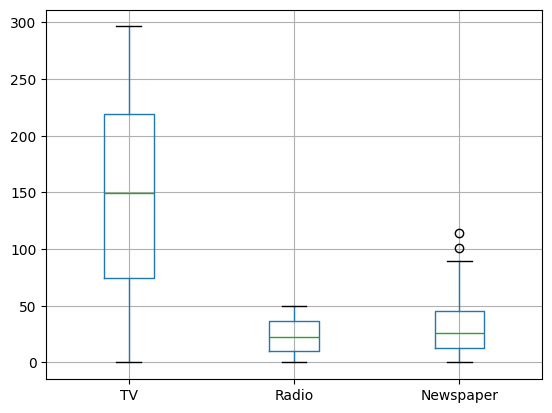

In [643]:
df[['TV','Radio','Newspaper']].boxplot()

## From above Boxplot we can say that Newspaper column have some outlier 
## In next step we are filling that values with mean value of newspaper column

In [644]:
mean_newspaper = df['Newspaper'].mean()
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Newspaper'] = df['Newspaper'].apply(lambda x: mean_newspaper if x < lower_bound or x > upper_bound else x)
print(df['Newspaper'])

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 200, dtype: float64


In [645]:
df['Newspaper'].unique()

array([69.2  , 45.1  , 69.3  , 58.5  , 58.4  , 75.   , 23.5  , 11.6  ,
        1.   , 21.2  , 24.2  ,  4.   , 65.9  ,  7.2  , 46.   , 52.9  ,
       30.554, 55.8  , 18.3  , 19.1  , 53.4  , 49.6  , 26.2  , 19.5  ,
       12.6  , 22.9  , 40.8  , 43.2  , 38.6  , 30.   ,  0.3  ,  7.4  ,
        8.5  ,  5.   , 45.7  , 35.1  , 32.   , 31.6  , 38.7  ,  1.8  ,
       26.4  , 43.3  , 31.5  , 35.7  , 18.5  , 49.9  , 36.8  , 34.6  ,
        3.6  , 39.6  , 58.7  , 15.9  , 60.   , 41.4  , 16.6  , 37.7  ,
        9.3  , 21.4  , 54.7  , 27.3  ,  8.4  , 28.9  ,  0.9  ,  2.2  ,
       10.2  , 11.   , 27.2  , 31.7  , 19.3  , 31.3  , 13.1  , 89.4  ,
       20.7  , 14.2  ,  9.4  , 23.1  , 22.3  , 36.9  , 32.5  , 35.6  ,
       33.8  , 65.7  , 16.   , 63.2  , 73.4  , 51.4  , 33.   , 59.   ,
       72.3  , 10.9  ,  5.9  , 22.   , 51.2  , 45.9  , 49.8  , 17.9  ,
        5.3  , 29.7  , 23.2  , 25.6  ,  5.5  , 56.5  ,  2.4  , 10.7  ,
       34.5  , 52.7  , 14.8  , 79.2  , 46.2  , 50.4  , 15.6  , 12.4  ,
      

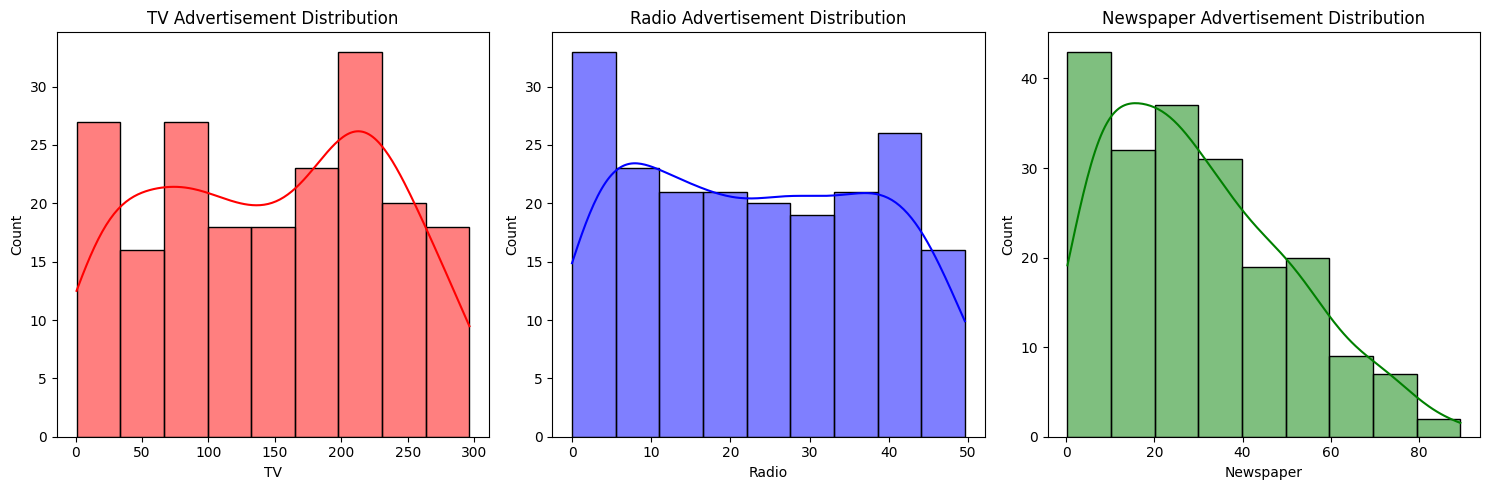

In [646]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['TV'], kde=True, color='red')
plt.title('TV Advertisement Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], kde=True, color='blue')
plt.title('Radio Advertisement Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], kde=True, color='green')
plt.title('Newspaper Advertisement Distribution')
plt.tight_layout()
plt.show()

### Above Graph states that TV and Radio are somewhat normally distributed and Newspaper is right skewed

<Axes: ylabel='Density'>

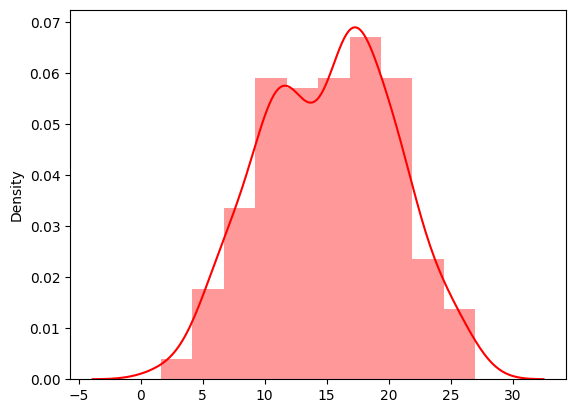

In [647]:
sns.distplot(x=df['Sales'],color='red')

In [648]:
from sklearn.model_selection import train_test_split

## Splitting the data into Training and testing set

In [649]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['Sales'],axis=1),df['Sales'],test_size=0.2,random_state=0)

In [650]:
X_train.shape

(160, 3)

In [651]:
X_test.shape

(40, 3)

<Axes: ylabel='Frequency'>

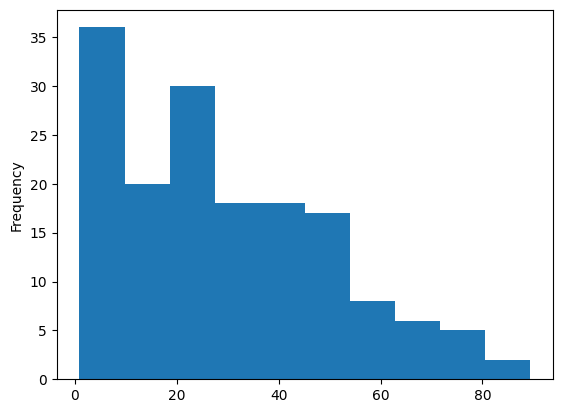

In [652]:
X_train.Newspaper.plot(kind='hist')

## Performing Box-Cox since data is right skewed

In [653]:
pt = PowerTransformer(method='box-cox') 

X_train_transformed = pt.fit_transform(X_train+0.00001)
X_test_transformed = pt.transform(X_test+0.00001)

In [654]:
sd = StandardScaler()

X_train_trf = sd.fit_transform(X_train_transformed)
X_test_trf =sd.transform(X_test_transformed)

## Training Model

In [655]:
lr = LinearRegression()

lr.fit(X_train_trf,y_train)
y_pred2 = lr.predict(X_test_trf)

In [656]:
r2_score(y_test,y_pred2)

0.8815733014734896

In [657]:
print(mean_squared_error(y_pred2,y_test))

3.952858186087718


In [658]:
y_pred2

array([11.19202671,  8.97800375,  9.12875871, 24.07892689, 15.08548374,
        8.47270508,  9.15595449, 18.43248105,  9.38969027, 18.30324015,
       22.82681069, 11.24782475, 13.50518487, 17.62819307, 12.20788638,
       14.01570323, 21.23687638,  7.70249856, 13.8544139 , 19.18727396,
       24.00775602, 12.483594  , 17.08068601, 14.44147345,  7.53834509,
       15.53573724, 15.21597459, 20.44922175, 16.7139924 ,  8.71150556,
       12.51332009, 20.38581919, 21.09989962, 21.62941781,  6.749819  ,
        6.8039819 ,  9.58654308, 15.99824828, 13.14275041,  7.13602768])

In [659]:
y_test

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
182     8.7
5       7.2
146    18.2
12      9.2
152    16.6
61     24.2
125    10.6
180    15.5
154    20.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     16.1
159    12.9
60      8.1
123    15.2
179    17.6
185    22.6
122    16.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      17.9
83     13.6
106     7.2
Name: Sales, dtype: float64

## Difference Between predicted and actaul price

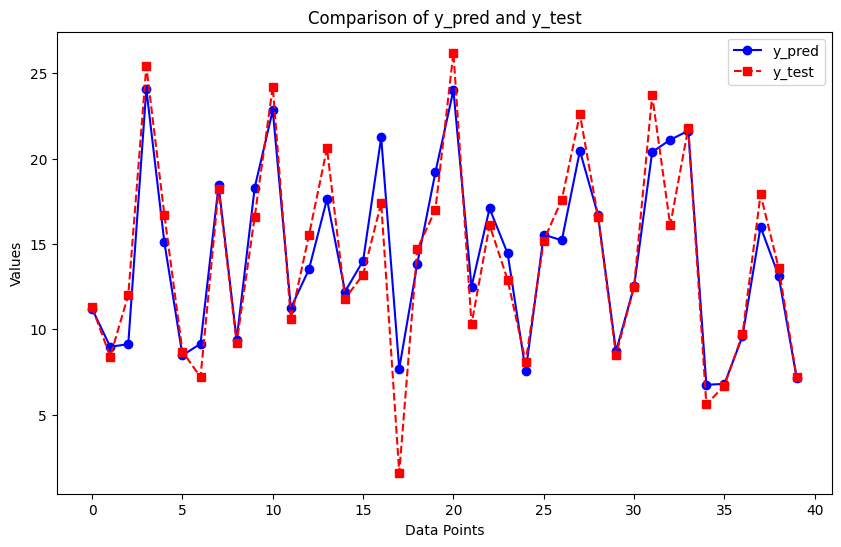

In [660]:
y_pred = np.array(y_pred2)
y_test = np.array(y_test)
x = np.arange(len(y_pred2))
plt.figure(figsize=(10, 6))
plt.plot(x, y_pred2, marker='o', linestyle='-', color='b', label='y_pred')
plt.plot(x, y_test, marker='s', linestyle='--', color='r', label='y_test')
plt.xlabel('Data Points')
plt.ylabel('Values')

plt.title('Comparison of y_pred and y_test')
plt.legend()
plt.show()

## Model Testing with new DATA

In [661]:
Data = {'TV':[100],'Radio':[30],'Newspaper':[20]}	
data = pd.DataFrame(Data)   

In [662]:
sales_price = lr.predict(data)
print('Predicted Sales Price:',sales_price)

Predicted Sales Price: [518.21361914]
